# Inferential Statistics:
    
Are there variables that are particularly significant in terms of explaining the answer to your project question?

Variables such as price of the house, number of bedrooms, bathrooms, square footage, location (zipcode) of a property. All of these factor into the purchase price of a home. By exploring how these variables affect the price of a property, we will be able to better answer the project question to help homebuyers make more confident offers. 

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

There appears to be a strong correlation between average price and location of a property. The location of the property is the independent variable and the price of the home is the dependent variable. From the data visualizations that we have done, it appears that the closer the property is to Seattle metropolitan area, the higher the value of the home. This suggests that homebuyers are willing to pay a higher premium for convenience to the larger city for work, tourism, restaurants etc. 



In [1]:
# Looking at filtering of cheap houses vs. expensive houses
# From there, filter down further. Cheap houses? What zipcodes are most popular? 
# Most expensive zipcodes?
# 98039 

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

In [3]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Convert zipcode to categorical value, this is due to zipcode nature of random numbers not having numberical value
# Using zipcodes as categorical will allow us to detect differences between zipcodes 

In [17]:
cat_zip = df['zipcode'].astype('category')

In [18]:
cat_zip

0        98178
1        98125
2        98028
3        98136
4        98074
5        98053
6        98003
7        98198
8        98146
9        98038
10       98007
11       98115
12       98028
13       98074
14       98107
15       98126
16       98019
17       98103
18       98002
19       98003
20       98133
21       98040
22       98092
23       98030
24       98030
25       98002
26       98119
27       98112
28       98115
29       98052
         ...  
21583    98102
21584    98116
21585    98042
21586    98107
21587    98125
21588    98117
21589    98038
21590    98074
21591    98178
21592    98103
21593    98056
21594    98042
21595    98103
21596    98059
21597    98040
21598    98001
21599    98053
21600    98004
21601    98125
21602    98010
21603    98065
21604    98144
21605    98056
21606    98136
21607    98116
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: category
Categories (70, int64): [98001, 98002, 

In [5]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count
print(count_row)
print(count_col)

21613
21


In [6]:
# How many houses are in each zipcode?
df['zipcode'].value_counts().head(10)

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
Name: zipcode, dtype: int64

In [7]:
# Calculate mean of prices in King County
np.mean(df['price'])

540182.1587933188

In [8]:
# Create dataframe of more affordable housing < 500k
cheap = df[(df['price'] < 500000) & 
                                           (df['price'] > 0) ]

In [9]:
# Mean of more affordable houses 
np.mean(cheap['price'])

338387.4663926499

In [10]:
cheap['zipcode'].value_counts().head(10)

98042    524
98038    518
98023    477
98133    432
98058    418
98118    393
98034    378
98155    364
98001    347
98092    325
Name: zipcode, dtype: int64

In [11]:
# Create dataframe of more expensive housing > 500k
expensive = df[(df['price'] > 500000)]

In [12]:
np.mean(expensive['price'])

817435.6914834861

In [13]:
expensive.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


In [14]:
price = (df['price'])

# One-Way ANOVA

We will be taking a look at Analysis of Variance Test or ANOVA. We will be conducting the One-Way ANOVA to 
compare if the mean price of multiple zipcodes are equal. Whereas the Two-Way ANOVA compares two or more variables and 
how they are related to the variable in question. 

Null hypothesis: The mean price between different zipcodes are the same. 
    
Alternative hypothesis: The mean price between different zipcodes are different. 

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
m = ols('price ~ cat_zip',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     214.6
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:55:01   Log-Likelihood:            -3.0197e+05
No. Observations:               21613   AIC:                         6.041e+05
Df Residuals:                   21543   BIC:                         6.046e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.808e+05   1.49e+04  

In [ ]:
# Interpreting coefficients
Now that we have converted the zipcode column to categorical variables, and run the One-Way ANOVA, we can see that there 
are differences between different zipcode values. Looking at the p-value under P>|t| we can see that most zipcodes are so
small that they are close to 0.000 This means that they are statistically significant and the means do differ and are 
unequal. This can be interpreted as the zipcode is a statistically significant predictor of price. 

This means that the difference is not statistically significant and we can't reject the hypothesis that their means are equal. 


The computed F-statistic is 214.6 Typically a high F-value means that your data does not support the null hypothesis well. This means that we reject the null hypothesis and that there is statistical significance between price of a property and location. 

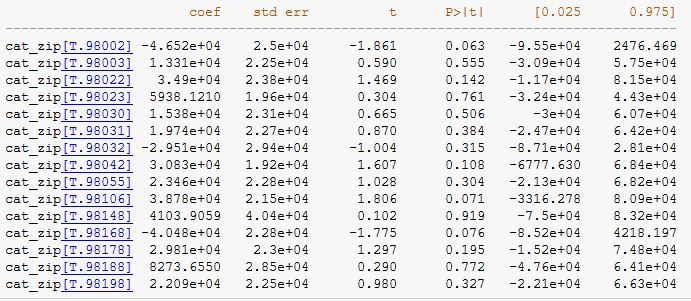

In [21]:
# Zipcodes of p-values greater than 0.05
from IPython.display import Image
img = 'C:/Users/jwhoj/Desktop/LoanDocs/nullzip.jpg'
Image(filename=img)